In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku
import numpy as np 

In [0]:
tokenizer = Tokenizer()
data = open('drive/My Drive/dataset/quotes.txt').read()
corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
label = ku.to_categorical(label, num_classes=total_words)

In [65]:
model = Sequential()
model.add(Embedding(total_words, 256, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(Dropout(0.1))
model.add(LSTM(256))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 449, 256)          446208    
_________________________________________________________________
bidirectional_7 (Bidirection (None, 449, 256)          394240    
_________________________________________________________________
dropout_6 (Dropout)          (None, 449, 256)          0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 256)               525312    
_________________________________________________________________
dense_9 (Dense)              (None, 871)               223847    
_________________________________________________________________
dense_10 (Dense)             (None, 1743)              1519896   
Total params: 3,109,503
Trainable params: 3,109,503
Non-trainable params: 0
____________________________________________

In [0]:
history = model.fit(predictors, label, epochs=50, verbose=1)

Epoch 1/50
327/327 [==============================] - 34s 103ms/step - loss: 6.7931 - accuracy: 0.0392
Epoch 2/50
216/327 [==================>...........] - ETA: 11s - loss: 5.8837 - accuracy: 0.0444

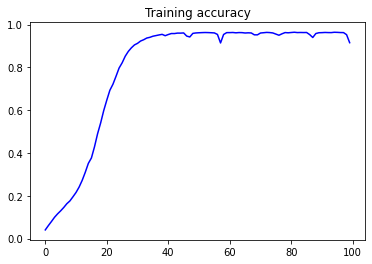

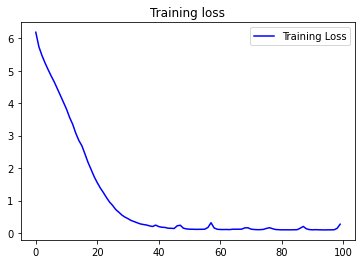

In [13]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [63]:
seed_text = "Vertigo"
next_words = 10
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Race goal is 'something higher' must expect someday to suffer vertigo
